### 와인 종류 예측을 위한 딥러닝

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import tensorflow as tf
import pandas as pd
import numpy as np
import os

Using TensorFlow backend.


In [2]:
np.random.seed(3)
tf.random.set_seed(3)

In [3]:
df_pre = pd.read_csv('./dataset/wine.csv', 
                     names=["주석산 농도", "아세트산 농도", "구연산 농도", "잔류 당분 농도", 
                            "염화나트륨 농도","유리 아황산 농동", "총 아황산 농도", "밀도", 
                            "pH", "황산칼륨 농도", "알코올 도수", "와인의 맛 등급", "분류"])
df_pre

,주석산 농도,아세트산 농도,구연산 농도,잔류 당분 농도,염화나트륨 농도,유리 아황산 농동,총 아황산 농도,밀도,pH,황산칼륨 농도,알코올 도수,와인의 맛 등급,분류
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [4]:
df_pre.head(10)

,주석산 농도,아세트산 농도,구연산 농도,잔류 당분 농도,염화나트륨 농도,유리 아황산 농동,총 아황산 농도,밀도,pH,황산칼륨 농도,알코올 도수,와인의 맛 등급,분류
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1


In [5]:
df = df_pre.sample(frac=0.15)  # sample(fran=%) : 몇 퍼센트로 뽑아서 셔플 할 것인지
df

,주석산 농도,아세트산 농도,구연산 농도,잔류 당분 농도,염화나트륨 농도,유리 아황산 농동,총 아황산 농도,밀도,pH,황산칼륨 농도,알코올 도수,와인의 맛 등급,분류
6245,5.9,0.180,0.28,1.00,0.037,24.0,88.0,0.99094,3.29,0.55,10.65,7,0
486,10.2,0.670,0.39,1.90,0.054,6.0,17.0,0.99760,3.17,0.47,10.00,5,1
273,8.4,0.715,0.20,2.40,0.076,10.0,38.0,0.99735,3.31,0.64,9.40,5,1
1993,6.8,0.370,0.51,11.80,0.044,62.0,163.0,0.99760,3.19,0.44,8.80,5,0
885,8.9,0.750,0.14,2.50,0.086,9.0,30.0,0.99824,3.34,0.64,10.50,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,8.2,0.570,0.26,2.20,0.060,28.0,65.0,0.99590,3.30,0.43,10.10,5,1
2584,6.0,0.410,0.21,1.90,0.050,29.0,122.0,0.99280,3.42,0.52,10.50,6,0
4446,5.8,0.200,0.34,1.00,0.035,40.0,86.0,0.98993,3.50,0.42,11.70,5,0
3471,5.8,0.330,0.20,16.05,0.047,26.0,166.0,0.99760,3.09,0.46,8.90,5,0


In [6]:
dataset = df.values
dataset

array([[ 5.9  ,  0.18 ,  0.28 , ..., 10.65 ,  7.   ,  0.   ],
       [10.2  ,  0.67 ,  0.39 , ..., 10.   ,  5.   ,  1.   ],
       [ 8.4  ,  0.715,  0.2  , ...,  9.4  ,  5.   ,  1.   ],
       ...,
       [ 5.8  ,  0.2  ,  0.34 , ..., 11.7  ,  5.   ,  0.   ],
       [ 5.8  ,  0.33 ,  0.2  , ...,  8.9  ,  5.   ,  0.   ],
       [ 6.2  ,  0.47 ,  0.21 , ...,  9.2  ,  5.   ,  0.   ]])

In [7]:
X = dataset[:,0:12]
Y = dataset[:,12]
X

array([[ 5.9  ,  0.18 ,  0.28 , ...,  0.55 , 10.65 ,  7.   ],
       [10.2  ,  0.67 ,  0.39 , ...,  0.47 , 10.   ,  5.   ],
       [ 8.4  ,  0.715,  0.2  , ...,  0.64 ,  9.4  ,  5.   ],
       ...,
       [ 5.8  ,  0.2  ,  0.34 , ...,  0.42 , 11.7  ,  5.   ],
       [ 5.8  ,  0.33 ,  0.2  , ...,  0.46 ,  8.9  ,  5.   ],
       [ 6.2  ,  0.47 ,  0.21 , ...,  0.46 ,  9.2  ,  5.   ]])

In [8]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
MODEL_DIR = './model_save(2)/'

In [11]:
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [12]:
modelpath="./model_save(2)/{epoch:02d}-{loss:.4f}.hdf5" 

In [13]:
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='loss', verbose=1, save_best_only=True)

In [14]:
early_stopping_callback = EarlyStopping(monitor='loss', patience=100)

In [15]:
history = model.fit(X, Y, validation_split=0.2, epochs=3000, batch_size=500, verbose=2, 
                    callbacks=[checkpointer,early_stopping_callback])

Train on 780 samples, validate on 195 samples
Epoch 1/3000
 - 0s - loss: 1.2415 - accuracy: 0.7256 - val_loss: 0.7791 - val_accuracy: 0.7744

Epoch 00001: loss improved from inf to 1.24155, saving model to ./model_save(2)/01-1.2415.hdf5
Epoch 2/3000
 - 0s - loss: 1.0559 - accuracy: 0.7256 - val_loss: 0.6617 - val_accuracy: 0.7744

Epoch 00002: loss improved from 1.24155 to 1.05592, saving model to ./model_save(2)/02-1.0559.hdf5
Epoch 3/3000
 - 0s - loss: 0.8867 - accuracy: 0.7256 - val_loss: 0.5611 - val_accuracy: 0.7744

Epoch 00003: loss improved from 1.05592 to 0.88670, saving model to ./model_save(2)/03-0.8867.hdf5
Epoch 4/3000
 - 0s - loss: 0.7503 - accuracy: 0.7256 - val_loss: 0.4793 - val_accuracy: 0.7744

Epoch 00004: loss improved from 0.88670 to 0.75034, saving model to ./model_save(2)/04-0.7503.hdf5
Epoch 5/3000
 - 0s - loss: 0.6375 - accuracy: 0.7256 - val_loss: 0.4131 - val_accuracy: 0.7744

Epoch 00005: loss improved from 0.75034 to 0.63753, saving model to ./model_save(2

Epoch 44/3000
 - 0s - loss: 0.3243 - accuracy: 0.9051 - val_loss: 0.2559 - val_accuracy: 0.9128

Epoch 00044: loss improved from 0.32594 to 0.32426, saving model to ./model_save(2)/44-0.3243.hdf5
Epoch 45/3000
 - 0s - loss: 0.3226 - accuracy: 0.9051 - val_loss: 0.2547 - val_accuracy: 0.9179

Epoch 00045: loss improved from 0.32426 to 0.32257, saving model to ./model_save(2)/45-0.3226.hdf5
Epoch 46/3000
 - 0s - loss: 0.3209 - accuracy: 0.9038 - val_loss: 0.2540 - val_accuracy: 0.9282

Epoch 00046: loss improved from 0.32257 to 0.32093, saving model to ./model_save(2)/46-0.3209.hdf5
Epoch 47/3000
 - 0s - loss: 0.3192 - accuracy: 0.9051 - val_loss: 0.2530 - val_accuracy: 0.9333

Epoch 00047: loss improved from 0.32093 to 0.31924, saving model to ./model_save(2)/47-0.3192.hdf5
Epoch 48/3000
 - 0s - loss: 0.3174 - accuracy: 0.9051 - val_loss: 0.2511 - val_accuracy: 0.9385

Epoch 00048: loss improved from 0.31924 to 0.31742, saving model to ./model_save(2)/48-0.3174.hdf5
Epoch 49/3000
 - 0s 


Epoch 00086: loss improved from 0.26024 to 0.25886, saving model to ./model_save(2)/86-0.2589.hdf5
Epoch 87/3000
 - 0s - loss: 0.2576 - accuracy: 0.9295 - val_loss: 0.1987 - val_accuracy: 0.9436

Epoch 00087: loss improved from 0.25886 to 0.25759, saving model to ./model_save(2)/87-0.2576.hdf5
Epoch 88/3000
 - 0s - loss: 0.2564 - accuracy: 0.9308 - val_loss: 0.1979 - val_accuracy: 0.9436

Epoch 00088: loss improved from 0.25759 to 0.25639, saving model to ./model_save(2)/88-0.2564.hdf5
Epoch 89/3000
 - 0s - loss: 0.2552 - accuracy: 0.9333 - val_loss: 0.1961 - val_accuracy: 0.9487

Epoch 00089: loss improved from 0.25639 to 0.25521, saving model to ./model_save(2)/89-0.2552.hdf5
Epoch 90/3000
 - 0s - loss: 0.2540 - accuracy: 0.9321 - val_loss: 0.1939 - val_accuracy: 0.9487

Epoch 00090: loss improved from 0.25521 to 0.25396, saving model to ./model_save(2)/90-0.2540.hdf5
Epoch 91/3000
 - 0s - loss: 0.2528 - accuracy: 0.9321 - val_loss: 0.1923 - val_accuracy: 0.9487

Epoch 00091: loss i

 - 0s - loss: 0.2197 - accuracy: 0.9410 - val_loss: 0.1663 - val_accuracy: 0.9538

Epoch 00128: loss improved from 0.22075 to 0.21974, saving model to ./model_save(2)/128-0.2197.hdf5
Epoch 129/3000
 - 0s - loss: 0.2191 - accuracy: 0.9410 - val_loss: 0.1666 - val_accuracy: 0.9487

Epoch 00129: loss improved from 0.21974 to 0.21911, saving model to ./model_save(2)/129-0.2191.hdf5
Epoch 130/3000
 - 0s - loss: 0.2185 - accuracy: 0.9423 - val_loss: 0.1669 - val_accuracy: 0.9487

Epoch 00130: loss improved from 0.21911 to 0.21853, saving model to ./model_save(2)/130-0.2185.hdf5
Epoch 131/3000
 - 0s - loss: 0.2179 - accuracy: 0.9423 - val_loss: 0.1659 - val_accuracy: 0.9487

Epoch 00131: loss improved from 0.21853 to 0.21794, saving model to ./model_save(2)/131-0.2179.hdf5
Epoch 132/3000
 - 0s - loss: 0.2173 - accuracy: 0.9410 - val_loss: 0.1636 - val_accuracy: 0.9538

Epoch 00132: loss improved from 0.21794 to 0.21727, saving model to ./model_save(2)/132-0.2173.hdf5
Epoch 133/3000
 - 0s - lo

 - 0s - loss: 0.1970 - accuracy: 0.9397 - val_loss: 0.1481 - val_accuracy: 0.9590

Epoch 00171: loss improved from 0.19754 to 0.19704, saving model to ./model_save(2)/171-0.1970.hdf5
Epoch 172/3000
 - 0s - loss: 0.1962 - accuracy: 0.9397 - val_loss: 0.1457 - val_accuracy: 0.9590

Epoch 00172: loss improved from 0.19704 to 0.19620, saving model to ./model_save(2)/172-0.1962.hdf5
Epoch 173/3000
 - 0s - loss: 0.1975 - accuracy: 0.9385 - val_loss: 0.1460 - val_accuracy: 0.9590

Epoch 00173: loss did not improve from 0.19620
Epoch 174/3000
 - 0s - loss: 0.1951 - accuracy: 0.9410 - val_loss: 0.1524 - val_accuracy: 0.9590

Epoch 00174: loss improved from 0.19620 to 0.19511, saving model to ./model_save(2)/174-0.1951.hdf5
Epoch 175/3000
 - 0s - loss: 0.1963 - accuracy: 0.9449 - val_loss: 0.1562 - val_accuracy: 0.9590

Epoch 00175: loss did not improve from 0.19511
Epoch 176/3000
 - 0s - loss: 0.1954 - accuracy: 0.9449 - val_loss: 0.1495 - val_accuracy: 0.9590

Epoch 00176: loss did not improve


Epoch 00215: loss improved from 0.17743 to 0.17716, saving model to ./model_save(2)/215-0.1772.hdf5
Epoch 216/3000
 - 0s - loss: 0.1773 - accuracy: 0.9436 - val_loss: 0.1347 - val_accuracy: 0.9590

Epoch 00216: loss did not improve from 0.17716
Epoch 217/3000
 - 0s - loss: 0.1765 - accuracy: 0.9462 - val_loss: 0.1386 - val_accuracy: 0.9590

Epoch 00217: loss improved from 0.17716 to 0.17648, saving model to ./model_save(2)/217-0.1765.hdf5
Epoch 218/3000
 - 0s - loss: 0.1757 - accuracy: 0.9449 - val_loss: 0.1390 - val_accuracy: 0.9538

Epoch 00218: loss improved from 0.17648 to 0.17567, saving model to ./model_save(2)/218-0.1757.hdf5
Epoch 219/3000
 - 0s - loss: 0.1757 - accuracy: 0.9449 - val_loss: 0.1369 - val_accuracy: 0.9538

Epoch 00219: loss did not improve from 0.17567
Epoch 220/3000
 - 0s - loss: 0.1748 - accuracy: 0.9462 - val_loss: 0.1360 - val_accuracy: 0.9590

Epoch 00220: loss improved from 0.17567 to 0.17475, saving model to ./model_save(2)/220-0.1748.hdf5
Epoch 221/3000


Epoch 260/3000
 - 0s - loss: 0.1593 - accuracy: 0.9487 - val_loss: 0.1285 - val_accuracy: 0.9641

Epoch 00260: loss improved from 0.15983 to 0.15932, saving model to ./model_save(2)/260-0.1593.hdf5
Epoch 261/3000
 - 0s - loss: 0.1595 - accuracy: 0.9500 - val_loss: 0.1269 - val_accuracy: 0.9641

Epoch 00261: loss did not improve from 0.15932
Epoch 262/3000
 - 0s - loss: 0.1587 - accuracy: 0.9487 - val_loss: 0.1234 - val_accuracy: 0.9641

Epoch 00262: loss improved from 0.15932 to 0.15867, saving model to ./model_save(2)/262-0.1587.hdf5
Epoch 263/3000
 - 0s - loss: 0.1581 - accuracy: 0.9474 - val_loss: 0.1207 - val_accuracy: 0.9692

Epoch 00263: loss improved from 0.15867 to 0.15812, saving model to ./model_save(2)/263-0.1581.hdf5
Epoch 264/3000
 - 0s - loss: 0.1583 - accuracy: 0.9462 - val_loss: 0.1218 - val_accuracy: 0.9641

Epoch 00264: loss did not improve from 0.15812
Epoch 265/3000
 - 0s - loss: 0.1570 - accuracy: 0.9487 - val_loss: 0.1269 - val_accuracy: 0.9641

Epoch 00265: loss 


Epoch 00306: loss improved from 0.14117 to 0.14056, saving model to ./model_save(2)/306-0.1406.hdf5
Epoch 307/3000
 - 0s - loss: 0.1401 - accuracy: 0.9615 - val_loss: 0.1167 - val_accuracy: 0.9641

Epoch 00307: loss improved from 0.14056 to 0.14005, saving model to ./model_save(2)/307-0.1401.hdf5
Epoch 308/3000
 - 0s - loss: 0.1396 - accuracy: 0.9603 - val_loss: 0.1147 - val_accuracy: 0.9641

Epoch 00308: loss improved from 0.14005 to 0.13962, saving model to ./model_save(2)/308-0.1396.hdf5
Epoch 309/3000
 - 0s - loss: 0.1393 - accuracy: 0.9590 - val_loss: 0.1152 - val_accuracy: 0.9641

Epoch 00309: loss improved from 0.13962 to 0.13931, saving model to ./model_save(2)/309-0.1393.hdf5
Epoch 310/3000
 - 0s - loss: 0.1385 - accuracy: 0.9590 - val_loss: 0.1132 - val_accuracy: 0.9692

Epoch 00310: loss improved from 0.13931 to 0.13850, saving model to ./model_save(2)/310-0.1385.hdf5
Epoch 311/3000
 - 0s - loss: 0.1385 - accuracy: 0.9590 - val_loss: 0.1143 - val_accuracy: 0.9641

Epoch 003


Epoch 00353: loss did not improve from 0.12644
Epoch 354/3000
 - 0s - loss: 0.1274 - accuracy: 0.9667 - val_loss: 0.1140 - val_accuracy: 0.9692

Epoch 00354: loss did not improve from 0.12644
Epoch 355/3000
 - 0s - loss: 0.1267 - accuracy: 0.9667 - val_loss: 0.1037 - val_accuracy: 0.9641

Epoch 00355: loss did not improve from 0.12644
Epoch 356/3000
 - 0s - loss: 0.1263 - accuracy: 0.9641 - val_loss: 0.1019 - val_accuracy: 0.9641

Epoch 00356: loss improved from 0.12644 to 0.12628, saving model to ./model_save(2)/356-0.1263.hdf5
Epoch 357/3000
 - 0s - loss: 0.1272 - accuracy: 0.9641 - val_loss: 0.1058 - val_accuracy: 0.9692

Epoch 00357: loss did not improve from 0.12628
Epoch 358/3000
 - 0s - loss: 0.1246 - accuracy: 0.9667 - val_loss: 0.1143 - val_accuracy: 0.9692

Epoch 00358: loss improved from 0.12628 to 0.12460, saving model to ./model_save(2)/358-0.1246.hdf5
Epoch 359/3000
 - 0s - loss: 0.1269 - accuracy: 0.9667 - val_loss: 0.1070 - val_accuracy: 0.9744

Epoch 00359: loss did n


Epoch 00402: loss did not improve from 0.11510
Epoch 403/3000
 - 0s - loss: 0.1165 - accuracy: 0.9667 - val_loss: 0.0983 - val_accuracy: 0.9692

Epoch 00403: loss did not improve from 0.11510
Epoch 404/3000
 - 0s - loss: 0.1143 - accuracy: 0.9718 - val_loss: 0.1043 - val_accuracy: 0.9744

Epoch 00404: loss improved from 0.11510 to 0.11435, saving model to ./model_save(2)/404-0.1143.hdf5
Epoch 405/3000
 - 0s - loss: 0.1156 - accuracy: 0.9731 - val_loss: 0.1033 - val_accuracy: 0.9744

Epoch 00405: loss did not improve from 0.11435
Epoch 406/3000
 - 0s - loss: 0.1146 - accuracy: 0.9718 - val_loss: 0.0981 - val_accuracy: 0.9692

Epoch 00406: loss did not improve from 0.11435
Epoch 407/3000
 - 0s - loss: 0.1155 - accuracy: 0.9692 - val_loss: 0.0969 - val_accuracy: 0.9692

Epoch 00407: loss did not improve from 0.11435
Epoch 408/3000
 - 0s - loss: 0.1142 - accuracy: 0.9692 - val_loss: 0.1021 - val_accuracy: 0.9744

Epoch 00408: loss improved from 0.11435 to 0.11419, saving model to ./model_

 - 0s - loss: 0.1062 - accuracy: 0.9744 - val_loss: 0.0941 - val_accuracy: 0.9744

Epoch 00451: loss improved from 0.10621 to 0.10620, saving model to ./model_save(2)/451-0.1062.hdf5
Epoch 452/3000
 - 0s - loss: 0.1056 - accuracy: 0.9731 - val_loss: 0.0952 - val_accuracy: 0.9744

Epoch 00452: loss improved from 0.10620 to 0.10562, saving model to ./model_save(2)/452-0.1056.hdf5
Epoch 453/3000
 - 0s - loss: 0.1061 - accuracy: 0.9744 - val_loss: 0.0960 - val_accuracy: 0.9744

Epoch 00453: loss did not improve from 0.10562
Epoch 454/3000
 - 0s - loss: 0.1053 - accuracy: 0.9731 - val_loss: 0.0931 - val_accuracy: 0.9692

Epoch 00454: loss improved from 0.10562 to 0.10534, saving model to ./model_save(2)/454-0.1053.hdf5
Epoch 455/3000
 - 0s - loss: 0.1059 - accuracy: 0.9731 - val_loss: 0.0942 - val_accuracy: 0.9744

Epoch 00455: loss did not improve from 0.10534
Epoch 456/3000
 - 0s - loss: 0.1058 - accuracy: 0.9744 - val_loss: 0.0977 - val_accuracy: 0.9744

Epoch 00456: loss did not improve


Epoch 00498: loss did not improve from 0.09848
Epoch 499/3000
 - 0s - loss: 0.0994 - accuracy: 0.9756 - val_loss: 0.0989 - val_accuracy: 0.9744

Epoch 00499: loss did not improve from 0.09848
Epoch 500/3000
 - 0s - loss: 0.1000 - accuracy: 0.9756 - val_loss: 0.0884 - val_accuracy: 0.9795

Epoch 00500: loss did not improve from 0.09848
Epoch 501/3000
 - 0s - loss: 0.1001 - accuracy: 0.9744 - val_loss: 0.0867 - val_accuracy: 0.9795

Epoch 00501: loss did not improve from 0.09848
Epoch 502/3000
 - 0s - loss: 0.1004 - accuracy: 0.9731 - val_loss: 0.0909 - val_accuracy: 0.9795

Epoch 00502: loss did not improve from 0.09848
Epoch 503/3000
 - 0s - loss: 0.1016 - accuracy: 0.9731 - val_loss: 0.0990 - val_accuracy: 0.9744

Epoch 00503: loss did not improve from 0.09848
Epoch 504/3000
 - 0s - loss: 0.1001 - accuracy: 0.9756 - val_loss: 0.0870 - val_accuracy: 0.9846

Epoch 00504: loss did not improve from 0.09848
Epoch 505/3000
 - 0s - loss: 0.0986 - accuracy: 0.9744 - val_loss: 0.0865 - val_ac


Epoch 00548: loss improved from 0.09088 to 0.09079, saving model to ./model_save(2)/548-0.0908.hdf5
Epoch 549/3000
 - 0s - loss: 0.0908 - accuracy: 0.9756 - val_loss: 0.0858 - val_accuracy: 0.9846

Epoch 00549: loss did not improve from 0.09079
Epoch 550/3000
 - 0s - loss: 0.0906 - accuracy: 0.9756 - val_loss: 0.0866 - val_accuracy: 0.9846

Epoch 00550: loss improved from 0.09079 to 0.09061, saving model to ./model_save(2)/550-0.0906.hdf5
Epoch 551/3000
 - 0s - loss: 0.0902 - accuracy: 0.9756 - val_loss: 0.0878 - val_accuracy: 0.9795

Epoch 00551: loss improved from 0.09061 to 0.09021, saving model to ./model_save(2)/551-0.0902.hdf5
Epoch 552/3000
 - 0s - loss: 0.0906 - accuracy: 0.9769 - val_loss: 0.0877 - val_accuracy: 0.9846

Epoch 00552: loss did not improve from 0.09021
Epoch 553/3000
 - 0s - loss: 0.0900 - accuracy: 0.9769 - val_loss: 0.0849 - val_accuracy: 0.9846

Epoch 00553: loss improved from 0.09021 to 0.08997, saving model to ./model_save(2)/553-0.0900.hdf5
Epoch 554/3000



Epoch 00597: loss did not improve from 0.08405
Epoch 598/3000
 - 0s - loss: 0.0829 - accuracy: 0.9795 - val_loss: 0.0810 - val_accuracy: 0.9846

Epoch 00598: loss improved from 0.08405 to 0.08293, saving model to ./model_save(2)/598-0.0829.hdf5
Epoch 599/3000
 - 0s - loss: 0.0867 - accuracy: 0.9756 - val_loss: 0.0810 - val_accuracy: 0.9846

Epoch 00599: loss did not improve from 0.08293
Epoch 600/3000
 - 0s - loss: 0.0846 - accuracy: 0.9756 - val_loss: 0.0881 - val_accuracy: 0.9795

Epoch 00600: loss did not improve from 0.08293
Epoch 601/3000
 - 0s - loss: 0.0850 - accuracy: 0.9795 - val_loss: 0.0904 - val_accuracy: 0.9795

Epoch 00601: loss did not improve from 0.08293
Epoch 602/3000
 - 0s - loss: 0.0851 - accuracy: 0.9795 - val_loss: 0.0819 - val_accuracy: 0.9846

Epoch 00602: loss did not improve from 0.08293
Epoch 603/3000
 - 0s - loss: 0.0836 - accuracy: 0.9756 - val_loss: 0.0814 - val_accuracy: 0.9846

Epoch 00603: loss did not improve from 0.08293
Epoch 604/3000
 - 0s - loss: 

 - 0s - loss: 0.0772 - accuracy: 0.9795 - val_loss: 0.0824 - val_accuracy: 0.9795

Epoch 00649: loss did not improve from 0.07697
Epoch 650/3000
 - 0s - loss: 0.0780 - accuracy: 0.9808 - val_loss: 0.0808 - val_accuracy: 0.9795

Epoch 00650: loss did not improve from 0.07697
Epoch 651/3000
 - 0s - loss: 0.0774 - accuracy: 0.9795 - val_loss: 0.0836 - val_accuracy: 0.9795

Epoch 00651: loss did not improve from 0.07697
Epoch 652/3000
 - 0s - loss: 0.0767 - accuracy: 0.9795 - val_loss: 0.0821 - val_accuracy: 0.9795

Epoch 00652: loss improved from 0.07697 to 0.07674, saving model to ./model_save(2)/652-0.0767.hdf5
Epoch 653/3000
 - 0s - loss: 0.0764 - accuracy: 0.9795 - val_loss: 0.0811 - val_accuracy: 0.9795

Epoch 00653: loss improved from 0.07674 to 0.07639, saving model to ./model_save(2)/653-0.0764.hdf5
Epoch 654/3000
 - 0s - loss: 0.0764 - accuracy: 0.9795 - val_loss: 0.0814 - val_accuracy: 0.9795

Epoch 00654: loss improved from 0.07639 to 0.07635, saving model to ./model_save(2)/65

 - 0s - loss: 0.0716 - accuracy: 0.9795 - val_loss: 0.0761 - val_accuracy: 0.9795

Epoch 00699: loss did not improve from 0.07118
Epoch 700/3000
 - 0s - loss: 0.0722 - accuracy: 0.9808 - val_loss: 0.0756 - val_accuracy: 0.9744

Epoch 00700: loss did not improve from 0.07118
Epoch 701/3000
 - 0s - loss: 0.0719 - accuracy: 0.9808 - val_loss: 0.0804 - val_accuracy: 0.9795

Epoch 00701: loss did not improve from 0.07118
Epoch 702/3000
 - 0s - loss: 0.0706 - accuracy: 0.9821 - val_loss: 0.0837 - val_accuracy: 0.9795

Epoch 00702: loss improved from 0.07118 to 0.07057, saving model to ./model_save(2)/702-0.0706.hdf5
Epoch 703/3000
 - 0s - loss: 0.0724 - accuracy: 0.9821 - val_loss: 0.0794 - val_accuracy: 0.9795

Epoch 00703: loss did not improve from 0.07057
Epoch 704/3000
 - 0s - loss: 0.0706 - accuracy: 0.9821 - val_loss: 0.0777 - val_accuracy: 0.9795

Epoch 00704: loss did not improve from 0.07057
Epoch 705/3000
 - 0s - loss: 0.0705 - accuracy: 0.9795 - val_loss: 0.0780 - val_accuracy: 0.


Epoch 00750: loss did not improve from 0.06674
Epoch 751/3000
 - 0s - loss: 0.0677 - accuracy: 0.9808 - val_loss: 0.0709 - val_accuracy: 0.9795

Epoch 00751: loss did not improve from 0.06674
Epoch 752/3000
 - 0s - loss: 0.0693 - accuracy: 0.9808 - val_loss: 0.0741 - val_accuracy: 0.9744

Epoch 00752: loss did not improve from 0.06674
Epoch 753/3000
 - 0s - loss: 0.0705 - accuracy: 0.9782 - val_loss: 0.0784 - val_accuracy: 0.9744

Epoch 00753: loss did not improve from 0.06674
Epoch 754/3000
 - 0s - loss: 0.0651 - accuracy: 0.9821 - val_loss: 0.0717 - val_accuracy: 0.9744

Epoch 00754: loss improved from 0.06674 to 0.06508, saving model to ./model_save(2)/754-0.0651.hdf5
Epoch 755/3000
 - 0s - loss: 0.0674 - accuracy: 0.9821 - val_loss: 0.0718 - val_accuracy: 0.9744

Epoch 00755: loss did not improve from 0.06508
Epoch 756/3000
 - 0s - loss: 0.0681 - accuracy: 0.9795 - val_loss: 0.0765 - val_accuracy: 0.9744

Epoch 00756: loss did not improve from 0.06508
Epoch 757/3000
 - 0s - loss: 

 - 0s - loss: 0.0613 - accuracy: 0.9808 - val_loss: 0.0724 - val_accuracy: 0.9744

Epoch 00802: loss improved from 0.06129 to 0.06126, saving model to ./model_save(2)/802-0.0613.hdf5
Epoch 803/3000
 - 0s - loss: 0.0612 - accuracy: 0.9808 - val_loss: 0.0711 - val_accuracy: 0.9744

Epoch 00803: loss improved from 0.06126 to 0.06125, saving model to ./model_save(2)/803-0.0612.hdf5
Epoch 804/3000
 - 0s - loss: 0.0620 - accuracy: 0.9821 - val_loss: 0.0722 - val_accuracy: 0.9744

Epoch 00804: loss did not improve from 0.06125
Epoch 805/3000
 - 0s - loss: 0.0613 - accuracy: 0.9782 - val_loss: 0.0758 - val_accuracy: 0.9744

Epoch 00805: loss did not improve from 0.06125
Epoch 806/3000
 - 0s - loss: 0.0617 - accuracy: 0.9795 - val_loss: 0.0717 - val_accuracy: 0.9744

Epoch 00806: loss did not improve from 0.06125
Epoch 807/3000
 - 0s - loss: 0.0618 - accuracy: 0.9833 - val_loss: 0.0703 - val_accuracy: 0.9744

Epoch 00807: loss did not improve from 0.06125
Epoch 808/3000
 - 0s - loss: 0.0615 - a


Epoch 00854: loss did not improve from 0.05736
Epoch 855/3000
 - 0s - loss: 0.0580 - accuracy: 0.9833 - val_loss: 0.0688 - val_accuracy: 0.9744

Epoch 00855: loss did not improve from 0.05736
Epoch 856/3000
 - 0s - loss: 0.0573 - accuracy: 0.9846 - val_loss: 0.0709 - val_accuracy: 0.9744

Epoch 00856: loss improved from 0.05736 to 0.05729, saving model to ./model_save(2)/856-0.0573.hdf5
Epoch 857/3000
 - 0s - loss: 0.0590 - accuracy: 0.9833 - val_loss: 0.0722 - val_accuracy: 0.9744

Epoch 00857: loss did not improve from 0.05729
Epoch 858/3000
 - 0s - loss: 0.0593 - accuracy: 0.9846 - val_loss: 0.0706 - val_accuracy: 0.9744

Epoch 00858: loss did not improve from 0.05729
Epoch 859/3000
 - 0s - loss: 0.0579 - accuracy: 0.9846 - val_loss: 0.0746 - val_accuracy: 0.9744

Epoch 00859: loss did not improve from 0.05729
Epoch 860/3000
 - 0s - loss: 0.0579 - accuracy: 0.9833 - val_loss: 0.0752 - val_accuracy: 0.9744

Epoch 00860: loss did not improve from 0.05729
Epoch 861/3000
 - 0s - loss: 


Epoch 00906: loss did not improve from 0.05443
Epoch 907/3000
 - 0s - loss: 0.0541 - accuracy: 0.9846 - val_loss: 0.0667 - val_accuracy: 0.9744

Epoch 00907: loss improved from 0.05443 to 0.05412, saving model to ./model_save(2)/907-0.0541.hdf5
Epoch 908/3000
 - 0s - loss: 0.0550 - accuracy: 0.9833 - val_loss: 0.0678 - val_accuracy: 0.9744

Epoch 00908: loss did not improve from 0.05412
Epoch 909/3000
 - 0s - loss: 0.0539 - accuracy: 0.9846 - val_loss: 0.0680 - val_accuracy: 0.9744

Epoch 00909: loss improved from 0.05412 to 0.05395, saving model to ./model_save(2)/909-0.0539.hdf5
Epoch 910/3000
 - 0s - loss: 0.0536 - accuracy: 0.9859 - val_loss: 0.0692 - val_accuracy: 0.9744

Epoch 00910: loss improved from 0.05395 to 0.05363, saving model to ./model_save(2)/910-0.0536.hdf5
Epoch 911/3000
 - 0s - loss: 0.0537 - accuracy: 0.9859 - val_loss: 0.0694 - val_accuracy: 0.9744

Epoch 00911: loss did not improve from 0.05363
Epoch 912/3000
 - 0s - loss: 0.0543 - accuracy: 0.9846 - val_loss: 0

 - 0s - loss: 0.0534 - accuracy: 0.9833 - val_loss: 0.0697 - val_accuracy: 0.9744

Epoch 00958: loss did not improve from 0.05129
Epoch 959/3000
 - 0s - loss: 0.0519 - accuracy: 0.9833 - val_loss: 0.0645 - val_accuracy: 0.9744

Epoch 00959: loss did not improve from 0.05129
Epoch 960/3000
 - 0s - loss: 0.0524 - accuracy: 0.9846 - val_loss: 0.0648 - val_accuracy: 0.9744

Epoch 00960: loss did not improve from 0.05129
Epoch 961/3000
 - 0s - loss: 0.0514 - accuracy: 0.9821 - val_loss: 0.0677 - val_accuracy: 0.9744

Epoch 00961: loss did not improve from 0.05129
Epoch 962/3000
 - 0s - loss: 0.0514 - accuracy: 0.9846 - val_loss: 0.0674 - val_accuracy: 0.9744

Epoch 00962: loss did not improve from 0.05129
Epoch 963/3000
 - 0s - loss: 0.0509 - accuracy: 0.9846 - val_loss: 0.0649 - val_accuracy: 0.9744

Epoch 00963: loss improved from 0.05129 to 0.05091, saving model to ./model_save(2)/963-0.0509.hdf5
Epoch 964/3000
 - 0s - loss: 0.0513 - accuracy: 0.9846 - val_loss: 0.0647 - val_accuracy: 0.


Epoch 01011: loss did not improve from 0.04812
Epoch 1012/3000
 - 0s - loss: 0.0511 - accuracy: 0.9846 - val_loss: 0.0651 - val_accuracy: 0.9744

Epoch 01012: loss did not improve from 0.04812
Epoch 1013/3000
 - 0s - loss: 0.0483 - accuracy: 0.9859 - val_loss: 0.0680 - val_accuracy: 0.9744

Epoch 01013: loss did not improve from 0.04812
Epoch 1014/3000
 - 0s - loss: 0.0486 - accuracy: 0.9846 - val_loss: 0.0670 - val_accuracy: 0.9744

Epoch 01014: loss did not improve from 0.04812
Epoch 1015/3000
 - 0s - loss: 0.0476 - accuracy: 0.9872 - val_loss: 0.0651 - val_accuracy: 0.9744

Epoch 01015: loss improved from 0.04812 to 0.04765, saving model to ./model_save(2)/1015-0.0476.hdf5
Epoch 1016/3000
 - 0s - loss: 0.0506 - accuracy: 0.9846 - val_loss: 0.0657 - val_accuracy: 0.9744

Epoch 01016: loss did not improve from 0.04765
Epoch 1017/3000
 - 0s - loss: 0.0496 - accuracy: 0.9859 - val_loss: 0.0711 - val_accuracy: 0.9744

Epoch 01017: loss did not improve from 0.04765
Epoch 1018/3000
 - 0s 


Epoch 01064: loss did not improve from 0.04525
Epoch 1065/3000
 - 0s - loss: 0.0467 - accuracy: 0.9846 - val_loss: 0.0647 - val_accuracy: 0.9744

Epoch 01065: loss did not improve from 0.04525
Epoch 1066/3000
 - 0s - loss: 0.0463 - accuracy: 0.9846 - val_loss: 0.0687 - val_accuracy: 0.9744

Epoch 01066: loss did not improve from 0.04525
Epoch 1067/3000
 - 0s - loss: 0.0473 - accuracy: 0.9846 - val_loss: 0.0641 - val_accuracy: 0.9744

Epoch 01067: loss did not improve from 0.04525
Epoch 1068/3000
 - 0s - loss: 0.0456 - accuracy: 0.9859 - val_loss: 0.0629 - val_accuracy: 0.9744

Epoch 01068: loss did not improve from 0.04525
Epoch 1069/3000
 - 0s - loss: 0.0464 - accuracy: 0.9846 - val_loss: 0.0655 - val_accuracy: 0.9744

Epoch 01069: loss did not improve from 0.04525
Epoch 1070/3000
 - 0s - loss: 0.0453 - accuracy: 0.9872 - val_loss: 0.0687 - val_accuracy: 0.9744

Epoch 01070: loss did not improve from 0.04525
Epoch 1071/3000
 - 0s - loss: 0.0462 - accuracy: 0.9859 - val_loss: 0.0678 -

Epoch 1117/3000
 - 0s - loss: 0.0446 - accuracy: 0.9872 - val_loss: 0.0646 - val_accuracy: 0.9744

Epoch 01117: loss did not improve from 0.04286
Epoch 1118/3000
 - 0s - loss: 0.0444 - accuracy: 0.9872 - val_loss: 0.0683 - val_accuracy: 0.9795

Epoch 01118: loss did not improve from 0.04286
Epoch 1119/3000
 - 0s - loss: 0.0439 - accuracy: 0.9859 - val_loss: 0.0642 - val_accuracy: 0.9744

Epoch 01119: loss did not improve from 0.04286
Epoch 1120/3000
 - 0s - loss: 0.0431 - accuracy: 0.9859 - val_loss: 0.0620 - val_accuracy: 0.9744

Epoch 01120: loss did not improve from 0.04286
Epoch 1121/3000
 - 0s - loss: 0.0446 - accuracy: 0.9872 - val_loss: 0.0632 - val_accuracy: 0.9744

Epoch 01121: loss did not improve from 0.04286
Epoch 1122/3000
 - 0s - loss: 0.0427 - accuracy: 0.9872 - val_loss: 0.0661 - val_accuracy: 0.9795

Epoch 01122: loss improved from 0.04286 to 0.04273, saving model to ./model_save(2)/1122-0.0427.hdf5
Epoch 1123/3000
 - 0s - loss: 0.0437 - accuracy: 0.9859 - val_loss: 0.


Epoch 01171: loss did not improve from 0.04053
Epoch 1172/3000
 - 0s - loss: 0.0409 - accuracy: 0.9885 - val_loss: 0.0625 - val_accuracy: 0.9795

Epoch 01172: loss did not improve from 0.04053
Epoch 1173/3000
 - 0s - loss: 0.0411 - accuracy: 0.9872 - val_loss: 0.0639 - val_accuracy: 0.9795

Epoch 01173: loss did not improve from 0.04053
Epoch 1174/3000
 - 0s - loss: 0.0410 - accuracy: 0.9859 - val_loss: 0.0611 - val_accuracy: 0.9744

Epoch 01174: loss did not improve from 0.04053
Epoch 1175/3000
 - 0s - loss: 0.0404 - accuracy: 0.9872 - val_loss: 0.0611 - val_accuracy: 0.9744

Epoch 01175: loss improved from 0.04053 to 0.04039, saving model to ./model_save(2)/1175-0.0404.hdf5
Epoch 1176/3000
 - 0s - loss: 0.0406 - accuracy: 0.9859 - val_loss: 0.0613 - val_accuracy: 0.9744

Epoch 01176: loss did not improve from 0.04039
Epoch 1177/3000
 - 0s - loss: 0.0407 - accuracy: 0.9859 - val_loss: 0.0603 - val_accuracy: 0.9744

Epoch 01177: loss did not improve from 0.04039
Epoch 1178/3000
 - 0s 


Epoch 01225: loss did not improve from 0.03843
Epoch 1226/3000
 - 0s - loss: 0.0391 - accuracy: 0.9846 - val_loss: 0.0608 - val_accuracy: 0.9795

Epoch 01226: loss did not improve from 0.03843
Epoch 1227/3000
 - 0s - loss: 0.0383 - accuracy: 0.9859 - val_loss: 0.0599 - val_accuracy: 0.9744

Epoch 01227: loss improved from 0.03843 to 0.03832, saving model to ./model_save(2)/1227-0.0383.hdf5
Epoch 1228/3000
 - 0s - loss: 0.0384 - accuracy: 0.9872 - val_loss: 0.0599 - val_accuracy: 0.9744

Epoch 01228: loss did not improve from 0.03832
Epoch 1229/3000
 - 0s - loss: 0.0384 - accuracy: 0.9872 - val_loss: 0.0611 - val_accuracy: 0.9795

Epoch 01229: loss did not improve from 0.03832
Epoch 1230/3000
 - 0s - loss: 0.0383 - accuracy: 0.9859 - val_loss: 0.0616 - val_accuracy: 0.9795

Epoch 01230: loss improved from 0.03832 to 0.03826, saving model to ./model_save(2)/1230-0.0383.hdf5
Epoch 1231/3000
 - 0s - loss: 0.0389 - accuracy: 0.9872 - val_loss: 0.0614 - val_accuracy: 0.9795

Epoch 01231: lo


Epoch 01277: loss did not improve from 0.03629
Epoch 1278/3000
 - 0s - loss: 0.0370 - accuracy: 0.9859 - val_loss: 0.0618 - val_accuracy: 0.9795

Epoch 01278: loss did not improve from 0.03629
Epoch 1279/3000
 - 0s - loss: 0.0370 - accuracy: 0.9885 - val_loss: 0.0612 - val_accuracy: 0.9795

Epoch 01279: loss did not improve from 0.03629
Epoch 1280/3000
 - 0s - loss: 0.0367 - accuracy: 0.9872 - val_loss: 0.0616 - val_accuracy: 0.9795

Epoch 01280: loss did not improve from 0.03629
Epoch 1281/3000
 - 0s - loss: 0.0366 - accuracy: 0.9859 - val_loss: 0.0603 - val_accuracy: 0.9795

Epoch 01281: loss did not improve from 0.03629
Epoch 1282/3000
 - 0s - loss: 0.0370 - accuracy: 0.9859 - val_loss: 0.0592 - val_accuracy: 0.9795

Epoch 01282: loss did not improve from 0.03629
Epoch 1283/3000
 - 0s - loss: 0.0365 - accuracy: 0.9872 - val_loss: 0.0576 - val_accuracy: 0.9744

Epoch 01283: loss did not improve from 0.03629
Epoch 1284/3000
 - 0s - loss: 0.0373 - accuracy: 0.9859 - val_loss: 0.0597 -


Epoch 01330: loss did not improve from 0.03483
Epoch 1331/3000
 - 0s - loss: 0.0351 - accuracy: 0.9885 - val_loss: 0.0615 - val_accuracy: 0.9795

Epoch 01331: loss did not improve from 0.03483
Epoch 1332/3000
 - 0s - loss: 0.0350 - accuracy: 0.9859 - val_loss: 0.0595 - val_accuracy: 0.9795

Epoch 01332: loss did not improve from 0.03483
Epoch 1333/3000
 - 0s - loss: 0.0347 - accuracy: 0.9859 - val_loss: 0.0595 - val_accuracy: 0.9795

Epoch 01333: loss improved from 0.03483 to 0.03468, saving model to ./model_save(2)/1333-0.0347.hdf5
Epoch 1334/3000
 - 0s - loss: 0.0350 - accuracy: 0.9859 - val_loss: 0.0599 - val_accuracy: 0.9795

Epoch 01334: loss did not improve from 0.03468
Epoch 1335/3000
 - 0s - loss: 0.0345 - accuracy: 0.9872 - val_loss: 0.0585 - val_accuracy: 0.9795

Epoch 01335: loss improved from 0.03468 to 0.03454, saving model to ./model_save(2)/1335-0.0345.hdf5
Epoch 1336/3000
 - 0s - loss: 0.0352 - accuracy: 0.9885 - val_loss: 0.0599 - val_accuracy: 0.9795

Epoch 01336: lo


Epoch 01384: loss did not improve from 0.03318
Epoch 1385/3000
 - 0s - loss: 0.0339 - accuracy: 0.9859 - val_loss: 0.0574 - val_accuracy: 0.9795

Epoch 01385: loss did not improve from 0.03318
Epoch 1386/3000
 - 0s - loss: 0.0333 - accuracy: 0.9872 - val_loss: 0.0607 - val_accuracy: 0.9795

Epoch 01386: loss did not improve from 0.03318
Epoch 1387/3000
 - 0s - loss: 0.0334 - accuracy: 0.9859 - val_loss: 0.0612 - val_accuracy: 0.9795

Epoch 01387: loss did not improve from 0.03318
Epoch 1388/3000
 - 0s - loss: 0.0348 - accuracy: 0.9846 - val_loss: 0.0592 - val_accuracy: 0.9795

Epoch 01388: loss did not improve from 0.03318
Epoch 1389/3000
 - 0s - loss: 0.0339 - accuracy: 0.9872 - val_loss: 0.0602 - val_accuracy: 0.9795

Epoch 01389: loss did not improve from 0.03318
Epoch 1390/3000
 - 0s - loss: 0.0328 - accuracy: 0.9859 - val_loss: 0.0590 - val_accuracy: 0.9795

Epoch 01390: loss improved from 0.03318 to 0.03283, saving model to ./model_save(2)/1390-0.0328.hdf5
Epoch 1391/3000
 - 0s 


Epoch 01439: loss did not improve from 0.03212
Epoch 1440/3000
 - 0s - loss: 0.0309 - accuracy: 0.9885 - val_loss: 0.0665 - val_accuracy: 0.9795

Epoch 01440: loss improved from 0.03212 to 0.03090, saving model to ./model_save(2)/1440-0.0309.hdf5
Epoch 1441/3000
 - 0s - loss: 0.0364 - accuracy: 0.9872 - val_loss: 0.0591 - val_accuracy: 0.9795

Epoch 01441: loss did not improve from 0.03090
Epoch 1442/3000
 - 0s - loss: 0.0302 - accuracy: 0.9859 - val_loss: 0.0559 - val_accuracy: 0.9795

Epoch 01442: loss improved from 0.03090 to 0.03020, saving model to ./model_save(2)/1442-0.0302.hdf5
Epoch 1443/3000
 - 0s - loss: 0.0380 - accuracy: 0.9859 - val_loss: 0.0564 - val_accuracy: 0.9846

Epoch 01443: loss did not improve from 0.03020
Epoch 1444/3000
 - 0s - loss: 0.0327 - accuracy: 0.9885 - val_loss: 0.0647 - val_accuracy: 0.9795

Epoch 01444: loss did not improve from 0.03020
Epoch 1445/3000
 - 0s - loss: 0.0365 - accuracy: 0.9846 - val_loss: 0.0639 - val_accuracy: 0.9795

Epoch 01445: lo


Epoch 01494: loss did not improve from 0.03017
Epoch 1495/3000
 - 0s - loss: 0.0322 - accuracy: 0.9859 - val_loss: 0.0612 - val_accuracy: 0.9795

Epoch 01495: loss did not improve from 0.03017
Epoch 1496/3000
 - 0s - loss: 0.0313 - accuracy: 0.9859 - val_loss: 0.0567 - val_accuracy: 0.9846

Epoch 01496: loss did not improve from 0.03017
Epoch 1497/3000
 - 0s - loss: 0.0306 - accuracy: 0.9885 - val_loss: 0.0586 - val_accuracy: 0.9795

Epoch 01497: loss did not improve from 0.03017
Epoch 1498/3000
 - 0s - loss: 0.0310 - accuracy: 0.9897 - val_loss: 0.0642 - val_accuracy: 0.9795

Epoch 01498: loss did not improve from 0.03017
Epoch 1499/3000
 - 0s - loss: 0.0309 - accuracy: 0.9885 - val_loss: 0.0632 - val_accuracy: 0.9795

Epoch 01499: loss did not improve from 0.03017
Epoch 1500/3000
 - 0s - loss: 0.0303 - accuracy: 0.9872 - val_loss: 0.0594 - val_accuracy: 0.9795

Epoch 01500: loss did not improve from 0.03017
Epoch 1501/3000
 - 0s - loss: 0.0297 - accuracy: 0.9897 - val_loss: 0.0575 -


Epoch 01548: loss did not improve from 0.02861
Epoch 1549/3000
 - 0s - loss: 0.0287 - accuracy: 0.9872 - val_loss: 0.0577 - val_accuracy: 0.9846

Epoch 01549: loss did not improve from 0.02861
Epoch 1550/3000
 - 0s - loss: 0.0301 - accuracy: 0.9885 - val_loss: 0.0598 - val_accuracy: 0.9795

Epoch 01550: loss did not improve from 0.02861
Epoch 1551/3000
 - 0s - loss: 0.0288 - accuracy: 0.9910 - val_loss: 0.0657 - val_accuracy: 0.9795

Epoch 01551: loss did not improve from 0.02861
Epoch 1552/3000
 - 0s - loss: 0.0299 - accuracy: 0.9872 - val_loss: 0.0633 - val_accuracy: 0.9795

Epoch 01552: loss did not improve from 0.02861
Epoch 1553/3000
 - 0s - loss: 0.0287 - accuracy: 0.9885 - val_loss: 0.0586 - val_accuracy: 0.9795

Epoch 01553: loss did not improve from 0.02861
Epoch 1554/3000
 - 0s - loss: 0.0306 - accuracy: 0.9885 - val_loss: 0.0582 - val_accuracy: 0.9795

Epoch 01554: loss did not improve from 0.02861
Epoch 1555/3000
 - 0s - loss: 0.0291 - accuracy: 0.9859 - val_loss: 0.0633 -

 - 0s - loss: 0.0278 - accuracy: 0.9897 - val_loss: 0.0606 - val_accuracy: 0.9795

Epoch 01603: loss did not improve from 0.02748
Epoch 1604/3000
 - 0s - loss: 0.0289 - accuracy: 0.9859 - val_loss: 0.0614 - val_accuracy: 0.9795

Epoch 01604: loss did not improve from 0.02748
Epoch 1605/3000
 - 0s - loss: 0.0278 - accuracy: 0.9897 - val_loss: 0.0596 - val_accuracy: 0.9795

Epoch 01605: loss did not improve from 0.02748
Epoch 1606/3000
 - 0s - loss: 0.0278 - accuracy: 0.9885 - val_loss: 0.0605 - val_accuracy: 0.9795

Epoch 01606: loss did not improve from 0.02748
Epoch 1607/3000
 - 0s - loss: 0.0279 - accuracy: 0.9885 - val_loss: 0.0613 - val_accuracy: 0.9795

Epoch 01607: loss did not improve from 0.02748
Epoch 1608/3000
 - 0s - loss: 0.0276 - accuracy: 0.9897 - val_loss: 0.0648 - val_accuracy: 0.9795

Epoch 01608: loss did not improve from 0.02748
Epoch 1609/3000
 - 0s - loss: 0.0281 - accuracy: 0.9885 - val_loss: 0.0633 - val_accuracy: 0.9795

Epoch 01609: loss did not improve from 0.


Epoch 01656: loss did not improve from 0.02647
Epoch 1657/3000
 - 0s - loss: 0.0270 - accuracy: 0.9897 - val_loss: 0.0592 - val_accuracy: 0.9795

Epoch 01657: loss did not improve from 0.02647
Epoch 1658/3000
 - 0s - loss: 0.0263 - accuracy: 0.9872 - val_loss: 0.0608 - val_accuracy: 0.9795

Epoch 01658: loss improved from 0.02647 to 0.02635, saving model to ./model_save(2)/1658-0.0263.hdf5
Epoch 1659/3000
 - 0s - loss: 0.0265 - accuracy: 0.9885 - val_loss: 0.0600 - val_accuracy: 0.9795

Epoch 01659: loss did not improve from 0.02635
Epoch 1660/3000
 - 0s - loss: 0.0266 - accuracy: 0.9872 - val_loss: 0.0578 - val_accuracy: 0.9795

Epoch 01660: loss did not improve from 0.02635
Epoch 1661/3000
 - 0s - loss: 0.0262 - accuracy: 0.9872 - val_loss: 0.0587 - val_accuracy: 0.9795

Epoch 01661: loss improved from 0.02635 to 0.02624, saving model to ./model_save(2)/1661-0.0262.hdf5
Epoch 1662/3000
 - 0s - loss: 0.0263 - accuracy: 0.9872 - val_loss: 0.0606 - val_accuracy: 0.9795

Epoch 01662: lo


Epoch 01709: loss did not improve from 0.02512
Epoch 1710/3000
 - 0s - loss: 0.0270 - accuracy: 0.9872 - val_loss: 0.0664 - val_accuracy: 0.9795

Epoch 01710: loss did not improve from 0.02512
Epoch 1711/3000
 - 0s - loss: 0.0274 - accuracy: 0.9897 - val_loss: 0.0682 - val_accuracy: 0.9795

Epoch 01711: loss did not improve from 0.02512
Epoch 1712/3000
 - 0s - loss: 0.0268 - accuracy: 0.9885 - val_loss: 0.0587 - val_accuracy: 0.9846

Epoch 01712: loss did not improve from 0.02512
Epoch 1713/3000
 - 0s - loss: 0.0296 - accuracy: 0.9885 - val_loss: 0.0575 - val_accuracy: 0.9846

Epoch 01713: loss did not improve from 0.02512
Epoch 1714/3000
 - 0s - loss: 0.0280 - accuracy: 0.9872 - val_loss: 0.0653 - val_accuracy: 0.9795

Epoch 01714: loss did not improve from 0.02512
Epoch 1715/3000
 - 0s - loss: 0.0272 - accuracy: 0.9885 - val_loss: 0.0650 - val_accuracy: 0.9795

Epoch 01715: loss did not improve from 0.02512
Epoch 1716/3000
 - 0s - loss: 0.0274 - accuracy: 0.9885 - val_loss: 0.0580 -

Epoch 1764/3000
 - 0s - loss: 0.0252 - accuracy: 0.9872 - val_loss: 0.0665 - val_accuracy: 0.9795

Epoch 01764: loss did not improve from 0.02465
Epoch 1765/3000
 - 0s - loss: 0.0251 - accuracy: 0.9910 - val_loss: 0.0630 - val_accuracy: 0.9795

Epoch 01765: loss did not improve from 0.02465
Epoch 1766/3000
 - 0s - loss: 0.0262 - accuracy: 0.9897 - val_loss: 0.0606 - val_accuracy: 0.9846

Epoch 01766: loss did not improve from 0.02465
Epoch 1767/3000
 - 0s - loss: 0.0257 - accuracy: 0.9910 - val_loss: 0.0655 - val_accuracy: 0.9795

Epoch 01767: loss did not improve from 0.02465
Epoch 1768/3000
 - 0s - loss: 0.0260 - accuracy: 0.9885 - val_loss: 0.0641 - val_accuracy: 0.9795

Epoch 01768: loss did not improve from 0.02465
Epoch 1769/3000
 - 0s - loss: 0.0253 - accuracy: 0.9897 - val_loss: 0.0587 - val_accuracy: 0.9846

Epoch 01769: loss did not improve from 0.02465
Epoch 1770/3000
 - 0s - loss: 0.0254 - accuracy: 0.9885 - val_loss: 0.0607 - val_accuracy: 0.9795

Epoch 01770: loss did not


Epoch 01819: loss did not improve from 0.02322
Epoch 1820/3000
 - 0s - loss: 0.0233 - accuracy: 0.9897 - val_loss: 0.0622 - val_accuracy: 0.9795

Epoch 01820: loss did not improve from 0.02322
Epoch 1821/3000
 - 0s - loss: 0.0242 - accuracy: 0.9885 - val_loss: 0.0615 - val_accuracy: 0.9795

Epoch 01821: loss did not improve from 0.02322
Epoch 1822/3000
 - 0s - loss: 0.0244 - accuracy: 0.9885 - val_loss: 0.0661 - val_accuracy: 0.9795

Epoch 01822: loss did not improve from 0.02322
Epoch 1823/3000
 - 0s - loss: 0.0239 - accuracy: 0.9923 - val_loss: 0.0638 - val_accuracy: 0.9795

Epoch 01823: loss did not improve from 0.02322
Epoch 1824/3000
 - 0s - loss: 0.0238 - accuracy: 0.9897 - val_loss: 0.0612 - val_accuracy: 0.9795

Epoch 01824: loss did not improve from 0.02322
Epoch 1825/3000
 - 0s - loss: 0.0236 - accuracy: 0.9897 - val_loss: 0.0626 - val_accuracy: 0.9795

Epoch 01825: loss did not improve from 0.02322
Epoch 1826/3000
 - 0s - loss: 0.0237 - accuracy: 0.9897 - val_loss: 0.0641 -


Epoch 01875: loss did not improve from 0.02199
Epoch 1876/3000
 - 0s - loss: 0.0228 - accuracy: 0.9885 - val_loss: 0.0600 - val_accuracy: 0.9846

Epoch 01876: loss did not improve from 0.02199
Epoch 1877/3000
 - 0s - loss: 0.0228 - accuracy: 0.9897 - val_loss: 0.0624 - val_accuracy: 0.9795

Epoch 01877: loss did not improve from 0.02199
Epoch 1878/3000
 - 0s - loss: 0.0223 - accuracy: 0.9910 - val_loss: 0.0640 - val_accuracy: 0.9795

Epoch 01878: loss did not improve from 0.02199
Epoch 1879/3000
 - 0s - loss: 0.0228 - accuracy: 0.9910 - val_loss: 0.0611 - val_accuracy: 0.9795

Epoch 01879: loss did not improve from 0.02199
Epoch 1880/3000
 - 0s - loss: 0.0223 - accuracy: 0.9897 - val_loss: 0.0592 - val_accuracy: 0.9846

Epoch 01880: loss did not improve from 0.02199
Epoch 1881/3000
 - 0s - loss: 0.0227 - accuracy: 0.9897 - val_loss: 0.0608 - val_accuracy: 0.9795

Epoch 01881: loss did not improve from 0.02199
Epoch 1882/3000
 - 0s - loss: 0.0220 - accuracy: 0.9897 - val_loss: 0.0635 -


Epoch 01928: loss did not improve from 0.02087
Epoch 1929/3000
 - 0s - loss: 0.0218 - accuracy: 0.9910 - val_loss: 0.0680 - val_accuracy: 0.9795

Epoch 01929: loss did not improve from 0.02087
Epoch 1930/3000
 - 0s - loss: 0.0223 - accuracy: 0.9897 - val_loss: 0.0619 - val_accuracy: 0.9795

Epoch 01930: loss did not improve from 0.02087
Epoch 1931/3000
 - 0s - loss: 0.0213 - accuracy: 0.9897 - val_loss: 0.0607 - val_accuracy: 0.9846

Epoch 01931: loss did not improve from 0.02087
Epoch 1932/3000
 - 0s - loss: 0.0214 - accuracy: 0.9910 - val_loss: 0.0634 - val_accuracy: 0.9795

Epoch 01932: loss did not improve from 0.02087
Epoch 1933/3000
 - 0s - loss: 0.0212 - accuracy: 0.9910 - val_loss: 0.0633 - val_accuracy: 0.9795

Epoch 01933: loss did not improve from 0.02087
Epoch 1934/3000
 - 0s - loss: 0.0208 - accuracy: 0.9923 - val_loss: 0.0626 - val_accuracy: 0.9795

Epoch 01934: loss improved from 0.02087 to 0.02084, saving model to ./model_save(2)/1934-0.0208.hdf5
Epoch 1935/3000
 - 0s 


Epoch 01982: loss did not improve from 0.02000
Epoch 1983/3000
 - 0s - loss: 0.0203 - accuracy: 0.9897 - val_loss: 0.0630 - val_accuracy: 0.9795

Epoch 01983: loss did not improve from 0.02000
Epoch 1984/3000
 - 0s - loss: 0.0198 - accuracy: 0.9910 - val_loss: 0.0647 - val_accuracy: 0.9795

Epoch 01984: loss improved from 0.02000 to 0.01977, saving model to ./model_save(2)/1984-0.0198.hdf5
Epoch 1985/3000
 - 0s - loss: 0.0203 - accuracy: 0.9910 - val_loss: 0.0631 - val_accuracy: 0.9795

Epoch 01985: loss did not improve from 0.01977
Epoch 1986/3000
 - 0s - loss: 0.0198 - accuracy: 0.9897 - val_loss: 0.0591 - val_accuracy: 0.9846

Epoch 01986: loss did not improve from 0.01977
Epoch 1987/3000
 - 0s - loss: 0.0207 - accuracy: 0.9910 - val_loss: 0.0596 - val_accuracy: 0.9846

Epoch 01987: loss did not improve from 0.01977
Epoch 1988/3000
 - 0s - loss: 0.0210 - accuracy: 0.9885 - val_loss: 0.0642 - val_accuracy: 0.9795

Epoch 01988: loss did not improve from 0.01977
Epoch 1989/3000
 - 0s 


Epoch 02035: loss did not improve from 0.01864
Epoch 2036/3000
 - 0s - loss: 0.0191 - accuracy: 0.9923 - val_loss: 0.0636 - val_accuracy: 0.9795

Epoch 02036: loss did not improve from 0.01864
Epoch 2037/3000
 - 0s - loss: 0.0193 - accuracy: 0.9923 - val_loss: 0.0668 - val_accuracy: 0.9795

Epoch 02037: loss did not improve from 0.01864
Epoch 2038/3000
 - 0s - loss: 0.0195 - accuracy: 0.9923 - val_loss: 0.0618 - val_accuracy: 0.9846

Epoch 02038: loss did not improve from 0.01864
Epoch 2039/3000
 - 0s - loss: 0.0192 - accuracy: 0.9910 - val_loss: 0.0594 - val_accuracy: 0.9846

Epoch 02039: loss did not improve from 0.01864
Epoch 2040/3000
 - 0s - loss: 0.0200 - accuracy: 0.9910 - val_loss: 0.0620 - val_accuracy: 0.9795

Epoch 02040: loss did not improve from 0.01864
Epoch 2041/3000
 - 0s - loss: 0.0189 - accuracy: 0.9936 - val_loss: 0.0665 - val_accuracy: 0.9795

Epoch 02041: loss did not improve from 0.01864
Epoch 2042/3000
 - 0s - loss: 0.0204 - accuracy: 0.9910 - val_loss: 0.0611 -


Epoch 02090: loss did not improve from 0.01777
Epoch 2091/3000
 - 0s - loss: 0.0182 - accuracy: 0.9936 - val_loss: 0.0600 - val_accuracy: 0.9846

Epoch 02091: loss did not improve from 0.01777
Epoch 2092/3000
 - 0s - loss: 0.0180 - accuracy: 0.9936 - val_loss: 0.0668 - val_accuracy: 0.9795

Epoch 02092: loss did not improve from 0.01777
Epoch 2093/3000
 - 0s - loss: 0.0187 - accuracy: 0.9923 - val_loss: 0.0631 - val_accuracy: 0.9846

Epoch 02093: loss did not improve from 0.01777
Epoch 2094/3000
 - 0s - loss: 0.0179 - accuracy: 0.9936 - val_loss: 0.0610 - val_accuracy: 0.9846

Epoch 02094: loss did not improve from 0.01777
Epoch 2095/3000
 - 0s - loss: 0.0186 - accuracy: 0.9923 - val_loss: 0.0622 - val_accuracy: 0.9846

Epoch 02095: loss did not improve from 0.01777
Epoch 2096/3000
 - 0s - loss: 0.0177 - accuracy: 0.9923 - val_loss: 0.0616 - val_accuracy: 0.9846

Epoch 02096: loss improved from 0.01777 to 0.01773, saving model to ./model_save(2)/2096-0.0177.hdf5
Epoch 2097/3000
 - 0s 


Epoch 02143: loss did not improve from 0.01601
Epoch 2144/3000
 - 0s - loss: 0.0158 - accuracy: 0.9962 - val_loss: 0.0597 - val_accuracy: 0.9846

Epoch 02144: loss improved from 0.01601 to 0.01577, saving model to ./model_save(2)/2144-0.0158.hdf5
Epoch 2145/3000
 - 0s - loss: 0.0167 - accuracy: 0.9936 - val_loss: 0.0613 - val_accuracy: 0.9846

Epoch 02145: loss did not improve from 0.01577
Epoch 2146/3000
 - 0s - loss: 0.0166 - accuracy: 0.9949 - val_loss: 0.0667 - val_accuracy: 0.9846

Epoch 02146: loss did not improve from 0.01577
Epoch 2147/3000
 - 0s - loss: 0.0188 - accuracy: 0.9897 - val_loss: 0.0634 - val_accuracy: 0.9846

Epoch 02147: loss did not improve from 0.01577
Epoch 2148/3000
 - 0s - loss: 0.0167 - accuracy: 0.9962 - val_loss: 0.0554 - val_accuracy: 0.9846

Epoch 02148: loss did not improve from 0.01577
Epoch 2149/3000
 - 0s - loss: 0.0179 - accuracy: 0.9910 - val_loss: 0.0560 - val_accuracy: 0.9846

Epoch 02149: loss did not improve from 0.01577
Epoch 2150/3000
 - 0s 


Epoch 02196: loss did not improve from 0.01476
Epoch 2197/3000
 - 0s - loss: 0.0152 - accuracy: 0.9936 - val_loss: 0.0582 - val_accuracy: 0.9846

Epoch 02197: loss did not improve from 0.01476
Epoch 2198/3000
 - 0s - loss: 0.0149 - accuracy: 0.9962 - val_loss: 0.0589 - val_accuracy: 0.9846

Epoch 02198: loss did not improve from 0.01476
Epoch 2199/3000
 - 0s - loss: 0.0154 - accuracy: 0.9962 - val_loss: 0.0594 - val_accuracy: 0.9846

Epoch 02199: loss did not improve from 0.01476
Epoch 2200/3000
 - 0s - loss: 0.0152 - accuracy: 0.9949 - val_loss: 0.0594 - val_accuracy: 0.9846

Epoch 02200: loss did not improve from 0.01476
Epoch 2201/3000
 - 0s - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.0603 - val_accuracy: 0.9846

Epoch 02201: loss did not improve from 0.01476
Epoch 2202/3000
 - 0s - loss: 0.0149 - accuracy: 0.9949 - val_loss: 0.0651 - val_accuracy: 0.9846

Epoch 02202: loss did not improve from 0.01476
Epoch 2203/3000
 - 0s - loss: 0.0153 - accuracy: 0.9949 - val_loss: 0.0614 -


Epoch 02250: loss did not improve from 0.01365
Epoch 2251/3000
 - 0s - loss: 0.0136 - accuracy: 0.9949 - val_loss: 0.0567 - val_accuracy: 0.9846

Epoch 02251: loss improved from 0.01365 to 0.01356, saving model to ./model_save(2)/2251-0.0136.hdf5
Epoch 2252/3000
 - 0s - loss: 0.0172 - accuracy: 0.9910 - val_loss: 0.0574 - val_accuracy: 0.9846

Epoch 02252: loss did not improve from 0.01356
Epoch 2253/3000
 - 0s - loss: 0.0159 - accuracy: 0.9949 - val_loss: 0.0662 - val_accuracy: 0.9795

Epoch 02253: loss did not improve from 0.01356
Epoch 2254/3000
 - 0s - loss: 0.0191 - accuracy: 0.9923 - val_loss: 0.0600 - val_accuracy: 0.9846

Epoch 02254: loss did not improve from 0.01356
Epoch 2255/3000
 - 0s - loss: 0.0175 - accuracy: 0.9910 - val_loss: 0.0577 - val_accuracy: 0.9846

Epoch 02255: loss did not improve from 0.01356
Epoch 2256/3000
 - 0s - loss: 0.0198 - accuracy: 0.9910 - val_loss: 0.0646 - val_accuracy: 0.9846

Epoch 02256: loss did not improve from 0.01356
Epoch 2257/3000
 - 0s 


Epoch 02304: loss did not improve from 0.01240
Epoch 2305/3000
 - 0s - loss: 0.0133 - accuracy: 0.9949 - val_loss: 0.0643 - val_accuracy: 0.9795

Epoch 02305: loss did not improve from 0.01240
Epoch 2306/3000
 - 0s - loss: 0.0139 - accuracy: 0.9962 - val_loss: 0.0642 - val_accuracy: 0.9795

Epoch 02306: loss did not improve from 0.01240
Epoch 2307/3000
 - 0s - loss: 0.0129 - accuracy: 0.9949 - val_loss: 0.0580 - val_accuracy: 0.9846

Epoch 02307: loss did not improve from 0.01240
Epoch 2308/3000
 - 0s - loss: 0.0152 - accuracy: 0.9923 - val_loss: 0.0578 - val_accuracy: 0.9846

Epoch 02308: loss did not improve from 0.01240
Epoch 2309/3000
 - 0s - loss: 0.0150 - accuracy: 0.9949 - val_loss: 0.0640 - val_accuracy: 0.9846

Epoch 02309: loss did not improve from 0.01240
Epoch 2310/3000
 - 0s - loss: 0.0139 - accuracy: 0.9949 - val_loss: 0.0605 - val_accuracy: 0.9846

Epoch 02310: loss did not improve from 0.01240
Epoch 2311/3000
 - 0s - loss: 0.0132 - accuracy: 0.9962 - val_loss: 0.0602 -


Epoch 02359: loss did not improve from 0.01189
Epoch 2360/3000
 - 0s - loss: 0.0120 - accuracy: 0.9949 - val_loss: 0.0629 - val_accuracy: 0.9897

Epoch 02360: loss did not improve from 0.01189
Epoch 2361/3000
 - 0s - loss: 0.0117 - accuracy: 0.9974 - val_loss: 0.0659 - val_accuracy: 0.9846

Epoch 02361: loss improved from 0.01189 to 0.01175, saving model to ./model_save(2)/2361-0.0117.hdf5
Epoch 2362/3000
 - 0s - loss: 0.0122 - accuracy: 0.9974 - val_loss: 0.0637 - val_accuracy: 0.9897

Epoch 02362: loss did not improve from 0.01175
Epoch 2363/3000
 - 0s - loss: 0.0118 - accuracy: 0.9974 - val_loss: 0.0600 - val_accuracy: 0.9846

Epoch 02363: loss did not improve from 0.01175
Epoch 2364/3000
 - 0s - loss: 0.0124 - accuracy: 0.9974 - val_loss: 0.0610 - val_accuracy: 0.9846

Epoch 02364: loss did not improve from 0.01175
Epoch 2365/3000
 - 0s - loss: 0.0127 - accuracy: 0.9974 - val_loss: 0.0650 - val_accuracy: 0.9846

Epoch 02365: loss did not improve from 0.01175
Epoch 2366/3000
 - 0s 


Epoch 02414: loss did not improve from 0.01111
Epoch 2415/3000
 - 0s - loss: 0.0121 - accuracy: 0.9974 - val_loss: 0.0645 - val_accuracy: 0.9795

Epoch 02415: loss did not improve from 0.01111
Epoch 2416/3000
 - 0s - loss: 0.0123 - accuracy: 0.9974 - val_loss: 0.0710 - val_accuracy: 0.9846

Epoch 02416: loss did not improve from 0.01111
Epoch 2417/3000
 - 0s - loss: 0.0125 - accuracy: 0.9962 - val_loss: 0.0634 - val_accuracy: 0.9846

Epoch 02417: loss did not improve from 0.01111
Epoch 2418/3000
 - 0s - loss: 0.0133 - accuracy: 0.9949 - val_loss: 0.0632 - val_accuracy: 0.9846

Epoch 02418: loss did not improve from 0.01111
Epoch 2419/3000
 - 0s - loss: 0.0120 - accuracy: 0.9962 - val_loss: 0.0717 - val_accuracy: 0.9846

Epoch 02419: loss did not improve from 0.01111
Epoch 2420/3000
 - 0s - loss: 0.0132 - accuracy: 0.9974 - val_loss: 0.0668 - val_accuracy: 0.9795

Epoch 02420: loss did not improve from 0.01111
Epoch 2421/3000
 - 0s - loss: 0.0113 - accuracy: 0.9974 - val_loss: 0.0598 -


Epoch 02470: loss did not improve from 0.01065
Epoch 2471/3000
 - 0s - loss: 0.0105 - accuracy: 0.9974 - val_loss: 0.0676 - val_accuracy: 0.9795

Epoch 02471: loss improved from 0.01065 to 0.01054, saving model to ./model_save(2)/2471-0.0105.hdf5
Epoch 2472/3000
 - 0s - loss: 0.0114 - accuracy: 0.9974 - val_loss: 0.0649 - val_accuracy: 0.9795

Epoch 02472: loss did not improve from 0.01054
Epoch 2473/3000
 - 0s - loss: 0.0108 - accuracy: 0.9974 - val_loss: 0.0625 - val_accuracy: 0.9846

Epoch 02473: loss did not improve from 0.01054
Epoch 2474/3000
 - 0s - loss: 0.0116 - accuracy: 0.9962 - val_loss: 0.0669 - val_accuracy: 0.9795

Epoch 02474: loss did not improve from 0.01054
Epoch 2475/3000
 - 0s - loss: 0.0105 - accuracy: 0.9962 - val_loss: 0.0728 - val_accuracy: 0.9795

Epoch 02475: loss improved from 0.01054 to 0.01049, saving model to ./model_save(2)/2475-0.0105.hdf5
Epoch 2476/3000
 - 0s - loss: 0.0112 - accuracy: 0.9974 - val_loss: 0.0710 - val_accuracy: 0.9795

Epoch 02476: lo


Epoch 02524: loss did not improve from 0.00990
Epoch 2525/3000
 - 0s - loss: 0.0106 - accuracy: 0.9974 - val_loss: 0.0746 - val_accuracy: 0.9795

Epoch 02525: loss did not improve from 0.00990
Epoch 2526/3000
 - 0s - loss: 0.0126 - accuracy: 0.9974 - val_loss: 0.0689 - val_accuracy: 0.9795

Epoch 02526: loss did not improve from 0.00990
Epoch 2527/3000
 - 0s - loss: 0.0104 - accuracy: 0.9974 - val_loss: 0.0604 - val_accuracy: 0.9846

Epoch 02527: loss did not improve from 0.00990
Epoch 2528/3000
 - 0s - loss: 0.0128 - accuracy: 0.9936 - val_loss: 0.0631 - val_accuracy: 0.9846

Epoch 02528: loss did not improve from 0.00990
Epoch 2529/3000
 - 0s - loss: 0.0114 - accuracy: 0.9962 - val_loss: 0.0747 - val_accuracy: 0.9795

Epoch 02529: loss did not improve from 0.00990
Epoch 2530/3000
 - 0s - loss: 0.0126 - accuracy: 0.9962 - val_loss: 0.0727 - val_accuracy: 0.9795

Epoch 02530: loss did not improve from 0.00990
Epoch 2531/3000
 - 0s - loss: 0.0112 - accuracy: 0.9936 - val_loss: 0.0663 -


Epoch 02580: loss did not improve from 0.00934
Epoch 2581/3000
 - 0s - loss: 0.0098 - accuracy: 0.9987 - val_loss: 0.0759 - val_accuracy: 0.9795

Epoch 02581: loss did not improve from 0.00934
Epoch 2582/3000
 - 0s - loss: 0.0101 - accuracy: 0.9974 - val_loss: 0.0706 - val_accuracy: 0.9795

Epoch 02582: loss did not improve from 0.00934
Epoch 2583/3000
 - 0s - loss: 0.0101 - accuracy: 0.9974 - val_loss: 0.0693 - val_accuracy: 0.9795

Epoch 02583: loss did not improve from 0.00934
Epoch 2584/3000
 - 0s - loss: 0.0098 - accuracy: 0.9974 - val_loss: 0.0761 - val_accuracy: 0.9795

Epoch 02584: loss did not improve from 0.00934
Epoch 2585/3000
 - 0s - loss: 0.0095 - accuracy: 0.9974 - val_loss: 0.0777 - val_accuracy: 0.9795

Epoch 02585: loss did not improve from 0.00934
Epoch 2586/3000
 - 0s - loss: 0.0097 - accuracy: 0.9974 - val_loss: 0.0745 - val_accuracy: 0.9795

Epoch 02586: loss did not improve from 0.00934
Epoch 2587/3000
 - 0s - loss: 0.0108 - accuracy: 0.9974 - val_loss: 0.0733 -


Epoch 02635: loss did not improve from 0.00888
Epoch 2636/3000
 - 0s - loss: 0.0091 - accuracy: 0.9974 - val_loss: 0.0787 - val_accuracy: 0.9795

Epoch 02636: loss did not improve from 0.00888
Epoch 2637/3000
 - 0s - loss: 0.0111 - accuracy: 0.9974 - val_loss: 0.0724 - val_accuracy: 0.9795

Epoch 02637: loss did not improve from 0.00888
Epoch 2638/3000
 - 0s - loss: 0.0102 - accuracy: 0.9974 - val_loss: 0.0692 - val_accuracy: 0.9795

Epoch 02638: loss did not improve from 0.00888
Epoch 2639/3000
 - 0s - loss: 0.0098 - accuracy: 0.9974 - val_loss: 0.0744 - val_accuracy: 0.9795

Epoch 02639: loss did not improve from 0.00888
Epoch 2640/3000
 - 0s - loss: 0.0092 - accuracy: 0.9987 - val_loss: 0.0746 - val_accuracy: 0.9795

Epoch 02640: loss did not improve from 0.00888
Epoch 2641/3000
 - 0s - loss: 0.0089 - accuracy: 0.9987 - val_loss: 0.0737 - val_accuracy: 0.9795

Epoch 02641: loss improved from 0.00888 to 0.00887, saving model to ./model_save(2)/2641-0.0089.hdf5
Epoch 2642/3000
 - 0s 


Epoch 02688: loss did not improve from 0.00848
Epoch 2689/3000
 - 0s - loss: 0.0084 - accuracy: 0.9974 - val_loss: 0.0734 - val_accuracy: 0.9795

Epoch 02689: loss improved from 0.00848 to 0.00839, saving model to ./model_save(2)/2689-0.0084.hdf5
Epoch 2690/3000
 - 0s - loss: 0.0093 - accuracy: 0.9987 - val_loss: 0.0730 - val_accuracy: 0.9795

Epoch 02690: loss did not improve from 0.00839
Epoch 2691/3000
 - 0s - loss: 0.0093 - accuracy: 0.9987 - val_loss: 0.0710 - val_accuracy: 0.9795

Epoch 02691: loss did not improve from 0.00839
Epoch 2692/3000
 - 0s - loss: 0.0094 - accuracy: 0.9974 - val_loss: 0.0764 - val_accuracy: 0.9795

Epoch 02692: loss did not improve from 0.00839
Epoch 2693/3000
 - 0s - loss: 0.0085 - accuracy: 0.9987 - val_loss: 0.0861 - val_accuracy: 0.9744

Epoch 02693: loss did not improve from 0.00839
Epoch 2694/3000
 - 0s - loss: 0.0105 - accuracy: 0.9962 - val_loss: 0.0767 - val_accuracy: 0.9795

Epoch 02694: loss did not improve from 0.00839
Epoch 2695/3000
 - 0s 


Epoch 02742: loss did not improve from 0.00786
Epoch 2743/3000
 - 0s - loss: 0.0088 - accuracy: 0.9987 - val_loss: 0.0765 - val_accuracy: 0.9795

Epoch 02743: loss did not improve from 0.00786
Epoch 2744/3000
 - 0s - loss: 0.0081 - accuracy: 0.9987 - val_loss: 0.0801 - val_accuracy: 0.9795

Epoch 02744: loss did not improve from 0.00786
Epoch 2745/3000
 - 0s - loss: 0.0087 - accuracy: 0.9974 - val_loss: 0.0765 - val_accuracy: 0.9795

Epoch 02745: loss did not improve from 0.00786
Epoch 2746/3000
 - 0s - loss: 0.0082 - accuracy: 0.9987 - val_loss: 0.0738 - val_accuracy: 0.9795

Epoch 02746: loss did not improve from 0.00786
Epoch 2747/3000
 - 0s - loss: 0.0081 - accuracy: 0.9974 - val_loss: 0.0738 - val_accuracy: 0.9795

Epoch 02747: loss did not improve from 0.00786
Epoch 2748/3000
 - 0s - loss: 0.0082 - accuracy: 0.9987 - val_loss: 0.0742 - val_accuracy: 0.9795

Epoch 02748: loss did not improve from 0.00786
Epoch 2749/3000
 - 0s - loss: 0.0081 - accuracy: 0.9987 - val_loss: 0.0759 -


Epoch 02798: loss did not improve from 0.00743
Epoch 2799/3000
 - 0s - loss: 0.0081 - accuracy: 0.9974 - val_loss: 0.0803 - val_accuracy: 0.9795

Epoch 02799: loss did not improve from 0.00743
Epoch 2800/3000
 - 0s - loss: 0.0081 - accuracy: 0.9987 - val_loss: 0.0777 - val_accuracy: 0.9795

Epoch 02800: loss did not improve from 0.00743
Epoch 2801/3000
 - 0s - loss: 0.0078 - accuracy: 0.9987 - val_loss: 0.0828 - val_accuracy: 0.9795

Epoch 02801: loss did not improve from 0.00743
Epoch 2802/3000
 - 0s - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0819 - val_accuracy: 0.9795

Epoch 02802: loss did not improve from 0.00743
Epoch 2803/3000
 - 0s - loss: 0.0074 - accuracy: 0.9987 - val_loss: 0.0750 - val_accuracy: 0.9795

Epoch 02803: loss improved from 0.00743 to 0.00736, saving model to ./model_save(2)/2803-0.0074.hdf5
Epoch 2804/3000
 - 0s - loss: 0.0088 - accuracy: 0.9974 - val_loss: 0.0770 - val_accuracy: 0.9795

Epoch 02804: loss did not improve from 0.00736
Epoch 2805/3000
 - 0s 

Epoch 2854/3000
 - 0s - loss: 0.0076 - accuracy: 0.9974 - val_loss: 0.0805 - val_accuracy: 0.9795

Epoch 02854: loss did not improve from 0.00730
Epoch 2855/3000
 - 0s - loss: 0.0070 - accuracy: 0.9987 - val_loss: 0.0746 - val_accuracy: 0.9795

Epoch 02855: loss improved from 0.00730 to 0.00704, saving model to ./model_save(2)/2855-0.0070.hdf5
Epoch 2856/3000
 - 0s - loss: 0.0083 - accuracy: 0.9987 - val_loss: 0.0754 - val_accuracy: 0.9795

Epoch 02856: loss did not improve from 0.00704
Epoch 2857/3000
 - 0s - loss: 0.0087 - accuracy: 0.9987 - val_loss: 0.0821 - val_accuracy: 0.9795

Epoch 02857: loss did not improve from 0.00704
Epoch 2858/3000
 - 0s - loss: 0.0089 - accuracy: 0.9974 - val_loss: 0.0751 - val_accuracy: 0.9795

Epoch 02858: loss did not improve from 0.00704
Epoch 2859/3000
 - 0s - loss: 0.0078 - accuracy: 0.9987 - val_loss: 0.0734 - val_accuracy: 0.9795

Epoch 02859: loss did not improve from 0.00704
Epoch 2860/3000
 - 0s - loss: 0.0098 - accuracy: 0.9949 - val_loss: 0.


Epoch 02909: loss improved from 0.00680 to 0.00665, saving model to ./model_save(2)/2909-0.0066.hdf5
Epoch 2910/3000
 - 0s - loss: 0.0069 - accuracy: 0.9987 - val_loss: 0.0818 - val_accuracy: 0.9795

Epoch 02910: loss did not improve from 0.00665
Epoch 2911/3000
 - 0s - loss: 0.0070 - accuracy: 0.9987 - val_loss: 0.0775 - val_accuracy: 0.9795

Epoch 02911: loss did not improve from 0.00665
Epoch 2912/3000
 - 0s - loss: 0.0070 - accuracy: 0.9987 - val_loss: 0.0798 - val_accuracy: 0.9795

Epoch 02912: loss did not improve from 0.00665
Epoch 2913/3000
 - 0s - loss: 0.0067 - accuracy: 0.9987 - val_loss: 0.0831 - val_accuracy: 0.9795

Epoch 02913: loss did not improve from 0.00665
Epoch 2914/3000
 - 0s - loss: 0.0067 - accuracy: 0.9987 - val_loss: 0.0849 - val_accuracy: 0.9795

Epoch 02914: loss did not improve from 0.00665
Epoch 2915/3000
 - 0s - loss: 0.0070 - accuracy: 0.9987 - val_loss: 0.0819 - val_accuracy: 0.9795

Epoch 02915: loss did not improve from 0.00665
Epoch 2916/3000
 - 0s 


Epoch 02964: loss did not improve from 0.00632
Epoch 2965/3000
 - 0s - loss: 0.0066 - accuracy: 0.9987 - val_loss: 0.0839 - val_accuracy: 0.9795

Epoch 02965: loss did not improve from 0.00632
Epoch 2966/3000
 - 0s - loss: 0.0065 - accuracy: 0.9987 - val_loss: 0.0859 - val_accuracy: 0.9795

Epoch 02966: loss did not improve from 0.00632
Epoch 2967/3000
 - 0s - loss: 0.0065 - accuracy: 0.9987 - val_loss: 0.0864 - val_accuracy: 0.9795

Epoch 02967: loss did not improve from 0.00632
Epoch 2968/3000
 - 0s - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0869 - val_accuracy: 0.9795

Epoch 02968: loss did not improve from 0.00632
Epoch 2969/3000
 - 0s - loss: 0.0065 - accuracy: 0.9987 - val_loss: 0.0848 - val_accuracy: 0.9795

Epoch 02969: loss did not improve from 0.00632
Epoch 2970/3000
 - 0s - loss: 0.0063 - accuracy: 0.9987 - val_loss: 0.0845 - val_accuracy: 0.9795

Epoch 02970: loss improved from 0.00632 to 0.00630, saving model to ./model_save(2)/2970-0.0063.hdf5
Epoch 2971/3000
 - 0s 

In [16]:
history

In [17]:
print(history.history)

{'val_loss': [0.7790659070014954, 0.6617433428764343, 0.5610946416854858, 0.4793039858341217, 0.41306716203689575, 0.3679463565349579, 0.3535301685333252, 0.36555564403533936, 0.3875618577003479, 0.399516224861145, 0.3914913833141327, 0.36820244789123535, 0.34049853682518005, 0.3171495795249939, 0.30385148525238037, 0.29869720339775085, 0.29632917046546936, 0.29429659247398376, 0.29181724786758423, 0.2892723083496094, 0.2875579297542572, 0.2875390350818634, 0.2897936999797821, 0.2929384410381317, 0.2947583794593811, 0.29363441467285156, 0.2901206314563751, 0.2853962481021881, 0.28103911876678467, 0.27719977498054504, 0.27408385276794434, 0.271640419960022, 0.27007392048835754, 0.26947689056396484, 0.26951053738594055, 0.26941946148872375, 0.26910915970802307, 0.2682282328605652, 0.2666742503643036, 0.2640724778175354, 0.26159995794296265, 0.25921985507011414, 0.2573331892490387, 0.2559230923652649, 0.2547028660774231, 0.2540455162525177, 0.25296637415885925, 0.2511094808578491, 0.24971

In [18]:
print(history.history['loss'])

[1.2415481805801392, 1.0559186048996754, 0.8867038029890794, 0.7503412656294994, 0.6375276522758679, 0.5450316820389185, 0.48173506214068484, 0.4486895134815803, 0.44681884080935746, 0.45751895354344296, 0.4590308031974695, 0.44747306903203327, 0.4255668505644187, 0.4021395620627281, 0.3883793308184697, 0.38346684590364116, 0.38338011503219604, 0.3842675296159891, 0.3829106161227593, 0.3788060928002382, 0.37339142499825895, 0.36757122247647017, 0.3628515601158142, 0.36076189157290334, 0.3599190146495134, 0.35909809974523693, 0.3570416569709778, 0.35430983778757924, 0.35104974263753647, 0.3486275229698572, 0.34690490212195957, 0.3457047083438971, 0.34416819153687894, 0.3421072883483691, 0.34019024479083526, 0.338003192956631, 0.3362347789299794, 0.3346099731249687, 0.33302943599529755, 0.3311825769069867, 0.32928111385076475, 0.3276319946998205, 0.3259354378932562, 0.32425999030088765, 0.3225728303958208, 0.3209336109650441, 0.3192359438309303, 0.3174248131421896, 0.31574845008361035, 0

In [19]:
print(history.history['val_loss'])

[0.7790659070014954, 0.6617433428764343, 0.5610946416854858, 0.4793039858341217, 0.41306716203689575, 0.3679463565349579, 0.3535301685333252, 0.36555564403533936, 0.3875618577003479, 0.399516224861145, 0.3914913833141327, 0.36820244789123535, 0.34049853682518005, 0.3171495795249939, 0.30385148525238037, 0.29869720339775085, 0.29632917046546936, 0.29429659247398376, 0.29181724786758423, 0.2892723083496094, 0.2875579297542572, 0.2875390350818634, 0.2897936999797821, 0.2929384410381317, 0.2947583794593811, 0.29363441467285156, 0.2901206314563751, 0.2853962481021881, 0.28103911876678467, 0.27719977498054504, 0.27408385276794434, 0.271640419960022, 0.27007392048835754, 0.26947689056396484, 0.26951053738594055, 0.26941946148872375, 0.26910915970802307, 0.2682282328605652, 0.2666742503643036, 0.2640724778175354, 0.26159995794296265, 0.25921985507011414, 0.2573331892490387, 0.2559230923652649, 0.2547028660774231, 0.2540455162525177, 0.25296637415885925, 0.2511094808578491, 0.24971069395542145,

In [20]:
import matplotlib.pyplot as plt
import matplotlib.font_manager

In [21]:
loss = history.history['loss']
vloss = history.history['val_loss']

In [22]:
print(type(vloss))
print(len(vloss))
print(vloss)

<class 'list'>
3000
[0.7790659070014954, 0.6617433428764343, 0.5610946416854858, 0.4793039858341217, 0.41306716203689575, 0.3679463565349579, 0.3535301685333252, 0.36555564403533936, 0.3875618577003479, 0.399516224861145, 0.3914913833141327, 0.36820244789123535, 0.34049853682518005, 0.3171495795249939, 0.30385148525238037, 0.29869720339775085, 0.29632917046546936, 0.29429659247398376, 0.29181724786758423, 0.2892723083496094, 0.2875579297542572, 0.2875390350818634, 0.2897936999797821, 0.2929384410381317, 0.2947583794593811, 0.29363441467285156, 0.2901206314563751, 0.2853962481021881, 0.28103911876678467, 0.27719977498054504, 0.27408385276794434, 0.271640419960022, 0.27007392048835754, 0.26947689056396484, 0.26951053738594055, 0.26941946148872375, 0.26910915970802307, 0.2682282328605652, 0.2666742503643036, 0.2640724778175354, 0.26159995794296265, 0.25921985507011414, 0.2573331892490387, 0.2559230923652649, 0.2547028660774231, 0.2540455162525177, 0.25296637415885925, 0.2511094808578491, 

In [23]:
acc = history.history['accuracy']
vacc = history.history['val_accuracy']

In [24]:
print(type(acc))
print(len(acc))
print(acc)

<class 'list'>
3000
[0.725641, 0.725641, 0.725641, 0.725641, 0.725641, 0.725641, 0.725641, 0.725641, 0.725641, 0.7294872, 0.7397436, 0.74871796, 0.75384617, 0.7589744, 0.7551282, 0.7397436, 0.73205125, 0.73205125, 0.7358974, 0.75, 0.76794875, 0.7846154, 0.80128205, 0.8141026, 0.8282051, 0.8423077, 0.85128206, 0.85641026, 0.86025643, 0.86153847, 0.8666667, 0.8679487, 0.87051284, 0.8730769, 0.87435895, 0.8833333, 0.8871795, 0.88974357, 0.89358974, 0.9, 0.9, 0.9012821, 0.90384614, 0.9051282, 0.9051282, 0.90384614, 0.9051282, 0.9051282, 0.9064103, 0.9064103, 0.9064103, 0.9064103, 0.9076923, 0.90897435, 0.9115385, 0.91410255, 0.9179487, 0.9217949, 0.9230769, 0.92435896, 0.925641, 0.92435896, 0.9230769, 0.9230769, 0.9230769, 0.9230769, 0.92435896, 0.925641, 0.925641, 0.9269231, 0.9269231, 0.925641, 0.925641, 0.925641, 0.925641, 0.925641, 0.925641, 0.9269231, 0.92820513, 0.92820513, 0.92820513, 0.92820513, 0.92820513, 0.92820513, 0.92820513, 0.92948717, 0.92948717, 0.9307692, 0.93333334, 0.93

In [25]:
print(type(vacc))
print(len(vacc))
print(vacc)

<class 'list'>
3000
[0.7743589878082275, 0.7743589878082275, 0.7743589878082275, 0.7743589878082275, 0.7743589878082275, 0.7743589878082275, 0.7743589878082275, 0.7794871926307678, 0.7846153974533081, 0.7948718070983887, 0.8102564215660095, 0.8102564215660095, 0.8102564215660095, 0.8102564215660095, 0.800000011920929, 0.800000011920929, 0.7897436022758484, 0.7897436022758484, 0.800000011920929, 0.8153846263885498, 0.8307692408561707, 0.8564102649688721, 0.8666666746139526, 0.8666666746139526, 0.8769230842590332, 0.8769230842590332, 0.8769230842590332, 0.8820512890815735, 0.8820512890815735, 0.8769230842590332, 0.8820512890815735, 0.8820512890815735, 0.8820512890815735, 0.8974359035491943, 0.8974359035491943, 0.9025641083717346, 0.9025641083717346, 0.9025641083717346, 0.9076923131942749, 0.9076923131942749, 0.9128205180168152, 0.9076923131942749, 0.9128205180168152, 0.9128205180168152, 0.9179487228393555, 0.928205132484436, 0.9333333373069763, 0.9384615421295166, 0.9384615421295166, 0.9

In [26]:
epoch = np.arange(len(acc))
print(type(epoch))
print(epoch)

<class 'numpy.ndarray'>
[   0    1    2 ... 2997 2998 2999]


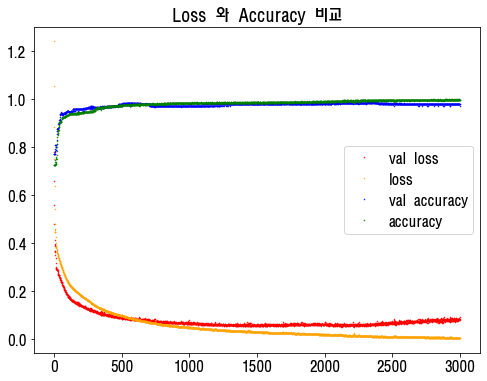

In [27]:
plt.figure(figsize=(8,6))
font_path = 'c:/windows/fonts/HMFMMUEX.TTC'
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name, size=14)

plt.title('Loss 와 Accuracy 비교')
plt.plot(epoch, vloss, '.', c='red', markersize=1, label='val loss')
plt.plot(epoch, loss, '.', c='orange', markersize=1, label='loss')
plt.plot(epoch, vacc, '.', c='blue', markersize=1, label='val accuracy')
plt.plot(epoch, acc, '.', c='green', markersize=1, label='accuracy')
plt.legend()

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                390       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
